In [12]:
%load_ext autoreload
%autoreload 2

import healpy as hp
from read_and_make import *
from ILC_helpers import *

band = np.array([30, 44, 70, 100, 143, 217, 353, 545, 857])
fwhm = np.array([32.65, 27.00, 13.01, 9.94, 7.04, 4.66, 4.41, 4.47, 4.23])
fwhm = fwhm/60*np.pi/180
model = ['d1', 'c1', 's1']
nside = 128
lmax = 3*nside-1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
#Create imap
MP = Make_Plank(band, lmax, nside, fwhm, model)
imaps = MP.make_imap()

In [6]:
#Change imap to alm
alms = MP.map_to_alm(imaps)

In [7]:
#Calculate　Cl
ILCP = ILC_Plank(alms, lmax)
Cl = ILCP.Cl_cal()

In [8]:
#Calculate weight
weights = ILCP.weight_cal(Cl)

In [9]:
#Do ILC
alm_clean = ILCP.do_ILC(weights)

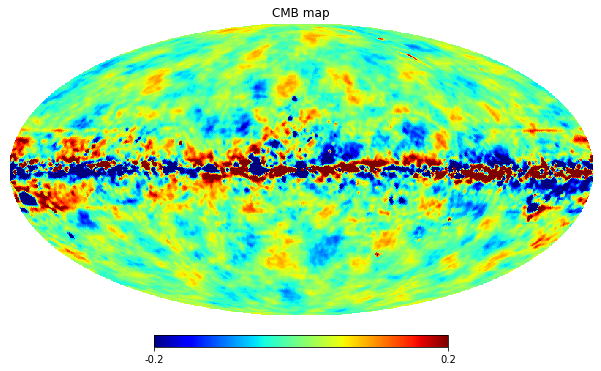

In [10]:
#Show clean cmb map
map_clean = hp.alm2map(alm_clean, nside = nside, fwhm = 1.0*np.pi/180, verbose=False)
hp.mollview(map_clean, title = 'CMB map', cmap = 'jet', max = 0.2, min = -0.2)